# Modelado

In [7]:
# Carga de librerias
import pandas as pd
from sklearn.cluster import KMeans
import sys
from sklearn.preprocessing import StandardScaler

#pyhton version
print("Version de Python: ", sys.version)

Version de Python:  3.12.1 (v3.12.1:2305ca5144, Dec  7 2023, 17:23:38) [Clang 13.0.0 (clang-1300.0.29.30)]


* Lectura de datos

In [8]:
xls = pd.ExcelFile("data.xlsx")
tabla1_raw = pd.read_excel(xls, 'base de datos 1 jugadores')
print(tabla1_raw.shape)
tabla1_raw.head()

(274, 16)


,ID,SEXO,EDAD,CATEGORIA,grupo,Categoria deportiva,Influenciapaterna,organización,Expectativasallogro,Miedoaloerrores,destre.Aperder,destre.Aganar,dstre.durantejuego,destre.Juegojusto,habilidadessociales,satisvida
0,163,0,13,3,0,1,20,10,22,26,16,22,21,22,50,14
1,164,0,13,3,0,1,20,10,22,26,16,22,21,22,50,14
2,252,0,12,3,0,1,30,24,24,33,20,20,21,20,49,16
3,251,0,13,3,0,1,17,23,23,37,19,22,22,24,50,16
4,162,0,13,3,0,1,16,30,23,17,19,21,23,23,47,17


* Estandarizado

In [9]:
columnas = ["Influenciapaterna", 	"organización", 	"Expectativasallogro",	"Miedoaloerrores",	"destre.Aperder",	"destre.Aganar", 	"dstre.durantejuego",	"destre.Juegojusto", 	"habilidadessociales",	"satisvida"]
tabla1 = tabla1_raw[columnas]

#Estandarizado 
st = StandardScaler()
tabla1_st = st.fit_transform(tabla1)
tabla1_st = pd.DataFrame(tabla1_st, columns=columnas)
tabla1_st

,Influenciapaterna,organización,Expectativasallogro,Miedoaloerrores,destre.Aperder,destre.Aganar,dstre.durantejuego,destre.Juegojusto,habilidadessociales,satisvida
0,-0.273388,-2.394738,-0.794966,-0.329887,-1.575840,0.208601,-0.461989,-0.084883,-0.768214,-1.664251
1,-0.273388,-2.394738,-0.794966,-0.329887,-1.575840,0.208601,-0.461989,-0.084883,-0.768214,-1.664251
2,1.002733,0.231395,-0.485562,0.448370,-0.150823,-0.613798,-0.461989,-0.996954,-0.993338,-1.095667
3,-0.656224,0.043815,-0.640264,0.893088,-0.507077,0.208601,-0.023979,0.827189,-0.768214,-1.095667
4,-0.783837,1.356881,-0.640264,-1.330502,-0.507077,-0.202598,0.414031,0.371153,-1.443585,-0.811374
...,...,...,...,...,...,...,...,...,...,...
269,-1.421897,1.356881,-1.723180,-1.775220,0.917940,1.442200,0.852041,0.827189,0.807652,1.462964
270,-0.911449,1.356881,-0.176157,0.003652,0.917940,1.031001,0.852041,1.283224,0.807652,1.462964
271,-0.145776,-0.706509,-0.949669,-0.663425,1.630448,1.442200,1.290051,-0.540918,-0.768214,1.462964
272,-1.294285,-0.894090,-1.259073,-1.552861,0.917940,1.031001,1.290051,-0.084883,0.807652,1.462964


* Agrupamiento

In [10]:
# BEST MODEL
kmeans_model = KMeans(n_clusters=3)
kmeans_labels = kmeans_model.fit_predict(tabla1_st)

* Red neuronal 3 capas

Una de entrada, dos ocultas y otra de salida

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Definimos X e Y
X = tabla1_st  
y = kmeans_labels 

# Se hace la partición de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el modelo neuronal
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))  # Input layer with 10 features
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 units
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units for classification


/Users/joaquimmorera/Desktop/side/jesus/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0240 - val_accuracy: 0.9545 - val_loss: 0.0808
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 0.9545 - val_loss: 0.0807
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 0.9545 - val_loss: 0.0796
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 0.9545 - val_loss: 0.0807
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 0.9545 - val_loss: 0.0819
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 0.9545 - val_loss: 0.0809
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.9545 - val_loss: 0.0801
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 0.9545 - val_loss: 0.0743
Epoch 9

* Evaluation

In [ ]:
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

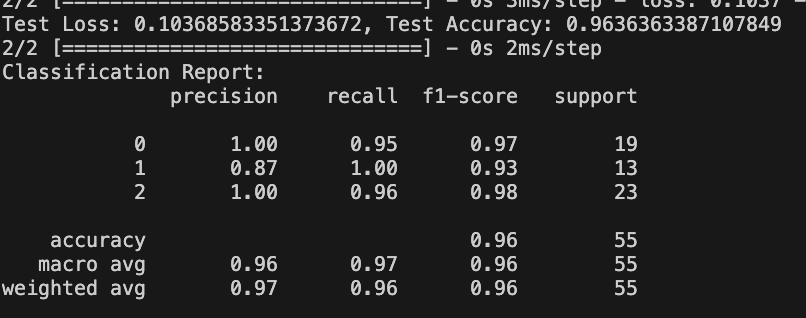

* Saving

In [ ]:
# model
model.save("jugadores_bestmodel.keras")

In [9]:
# StandardScaler
from joblib import dump, load

# Save the scaler to a file
dump(st, 'jugadores_scaler.joblib')

['jugadores_scaler.joblib']

## RESULTADO CASO 2: Niños

El procedimiento es el mismo que el anterior. Se emplea la misma red y los mismos parámetros

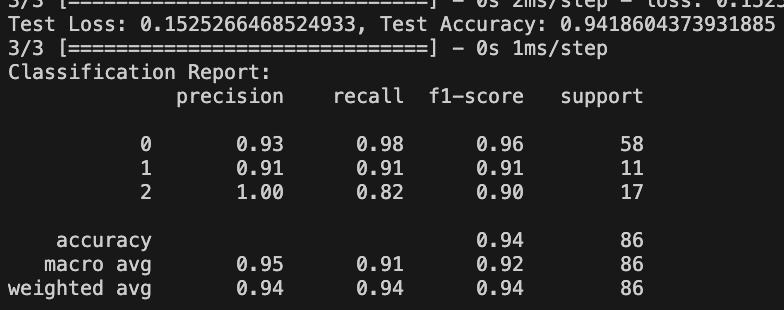